# **M2AC Simulation**
----

In [ ]:
# Force the correct environment for CityLearn and Hydra on Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 115.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have nump

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.9 MB/s eta 0:00:00

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


**Import list**

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *

# Data structure import
import pandas as pd
from datetime import datetime

# Plot import
from IPython.display import display, Markdown
from utils import plotting_functions as plt

# import for using model-based agents
# initialize Hydra in programmatic mode
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

# Work directory setter
import os, shutil
os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')

import agents.model_based.mbrl.algorithms.m2ac as m2ac
import agents.model_based.mbrl.util.env as env_util

In [ ]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):
    print(f"Using the following algorithm: {cfg.algorithm.name}!")
    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    print(f"Reward function: {reward_fn}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    m2ac.train(env, test_env, term_fn, cfg, work_dir="./exp/m2ac")
    return env,test_env

# Clean Hydra
from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()
# Load cfg
initialize(config_path="./mbrl/examples/conf")
cfg = compose(config_name="main_m2ac")
test_cfg = compose(config_name="test_m2ac")
# Clean previous result
[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./exp/m2ac', f) for f in os.listdir('./exp/m2ac')]]
# Run agent
env, test_env = run(cfg, test_cfg)

INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_local_evaluation dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_local_evaluation') is called, it will read from cache unless DataSet.clear_cache is run first.


22330
719
Using the following algorithm: m2ac!


INFO:root:The PV sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_pv_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The battery sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_battery_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_online_evaluation_3 dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_online_evaluation_3') is called, it will read from cache unless DataSet.clear_cache is run first.


Output streaming troncato alle ultime 5000 righe.
| model_train    | I: 0 | E: 7 | TD: 10598 | VD: 2649 | MLOSS: -57.4084 | MVSCORE: 0.0608 | MBVSCORE: 0.0522
| model_train    | I: 0 | E: 8 | TD: 10598 | VD: 2649 | MLOSS: -57.4472 | MVSCORE: 0.0640 | MBVSCORE: 0.0522
| model_train    | I: 0 | E: 9 | TD: 10598 | VD: 2649 | MLOSS: -57.4627 | MVSCORE: 0.0608 | MBVSCORE: 0.0522
| model_train    | I: 0 | E: 10 | TD: 10598 | VD: 2649 | MLOSS: -57.4928 | MVSCORE: 0.0622 | MBVSCORE: 0.0522
| train          | S: 125000 | BR: -10.3202 | ALOSS: 16.6736 | TENTR: -9.0000 | CLOSS: 24.3232 | TLOSS: -0.0056 | ALPHA: 0.6731 | AENTR: -8.9852
| train          | S: 125100 | BR: -10.0827 | ALOSS: 16.5158 | TENTR: -9.0000 | CLOSS: 25.1470 | TLOSS: -0.0118 | ALPHA: 0.6736 | AENTR: -8.9699
| train          | S: 125200 | BR: -10.0076 | ALOSS: 16.4018 | TENTR: -9.0000 | CLOSS: 24.8212 | TLOSS: -0.0172 | ALPHA: 0.6706 | AENTR: -8.9568
| model_train    | I: 0 | E: 0 | TD: 10621 | VD: 2655 | MLOSS: -57.0216 | MVSC


----

## **Cost Function and building parameter**



In [ ]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)

# Setting benchmark building
num_building = 0

2207

In [ ]:
kpis_names = {
    'electricity_consumption_total': 'Total grid consumption',
    'carbon_emissions_total': 'Emissions',
    'discomfort_proportion': 'Proportion of time outside comfort range',
    'daily_peak_minus_load_factor_average': 'Measure of inefficiency in daily power usage',
    'daily_peak_average': 'Average daily peak',
    'all_time_peak_average': 'Maximum district consumption peak',
    'one_minus_thermal_resilience_proportion': 'Discomfort proportion during power outages',
    'power_outage_normalized_unserved_energy_total': 'Unmet demand due to energy shortage',
    'ramping_average': 'Average difference between current and previous timestep consumption',
    # Here to add cost function
}

display(Markdown(f"### **M2AC - Base Version**"))
display(Markdown("----"))

kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)

name                                           Building_1  Building_2  \
cost_function                                                           
all_time_peak_average                                 NaN         NaN   
carbon_emissions_total                              0.825       1.056   
daily_peak_average                                    NaN         NaN   
discomfort_proportion                               0.017       0.009   
electricity_consumption_total                       0.826       1.055   
one_minus_thermal_resilience_proportion             0.308       0.462   
power_outage_normalized_unserved_energy_total       0.631       0.713   
ramping_average                                       NaN         NaN   

name                                           Building_3  District  
cost_function                                                        
all_time_peak_average                                 NaN     0.969  
carbon_emissions_total                              0.862     0.914  
daily_peak_average                                    NaN     0.921  
discomfort_proportion                               0.034     0.020  
electricity_consumption_total                       0.861     0.914  
one_minus_thermal_resilience_proportion             0.167     0.312  
power_outage_normalized_unserved_energy_total       0.521     0.622  
ramping_average                                       NaN     0.918


------

## **Consumption Behavior**

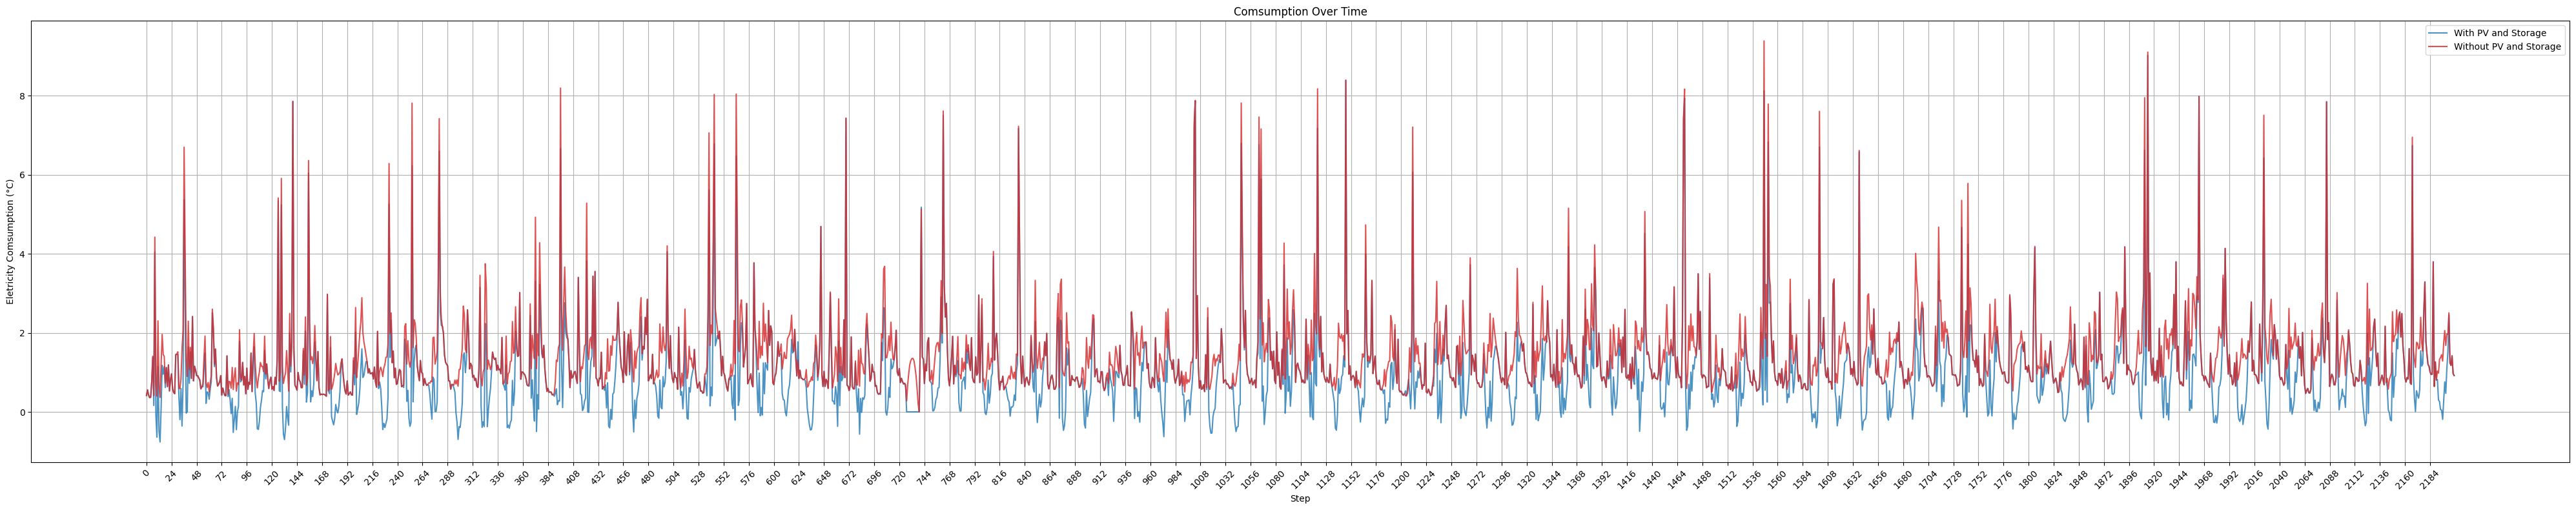

In [ ]:
energy_with_pv= eval_env.buildings[num_building].net_electricity_consumption
energy_without_pv = eval_env.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°C)',
    title='Comsumption Over Time',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

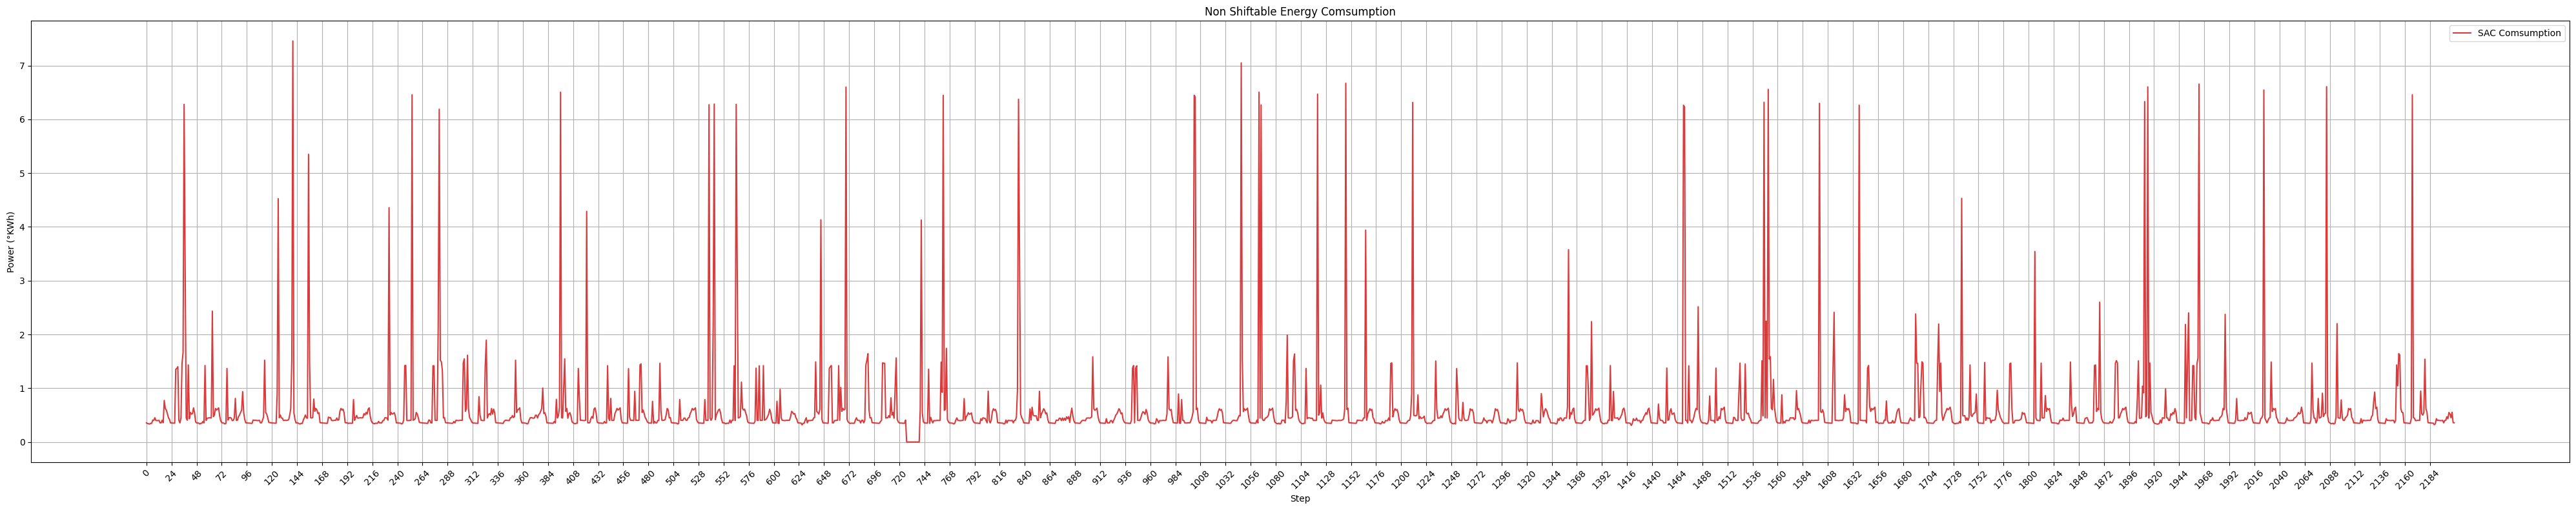

In [ ]:
non_energy = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='M2AC Comsumption',
)


------

## **Temperature behavior**

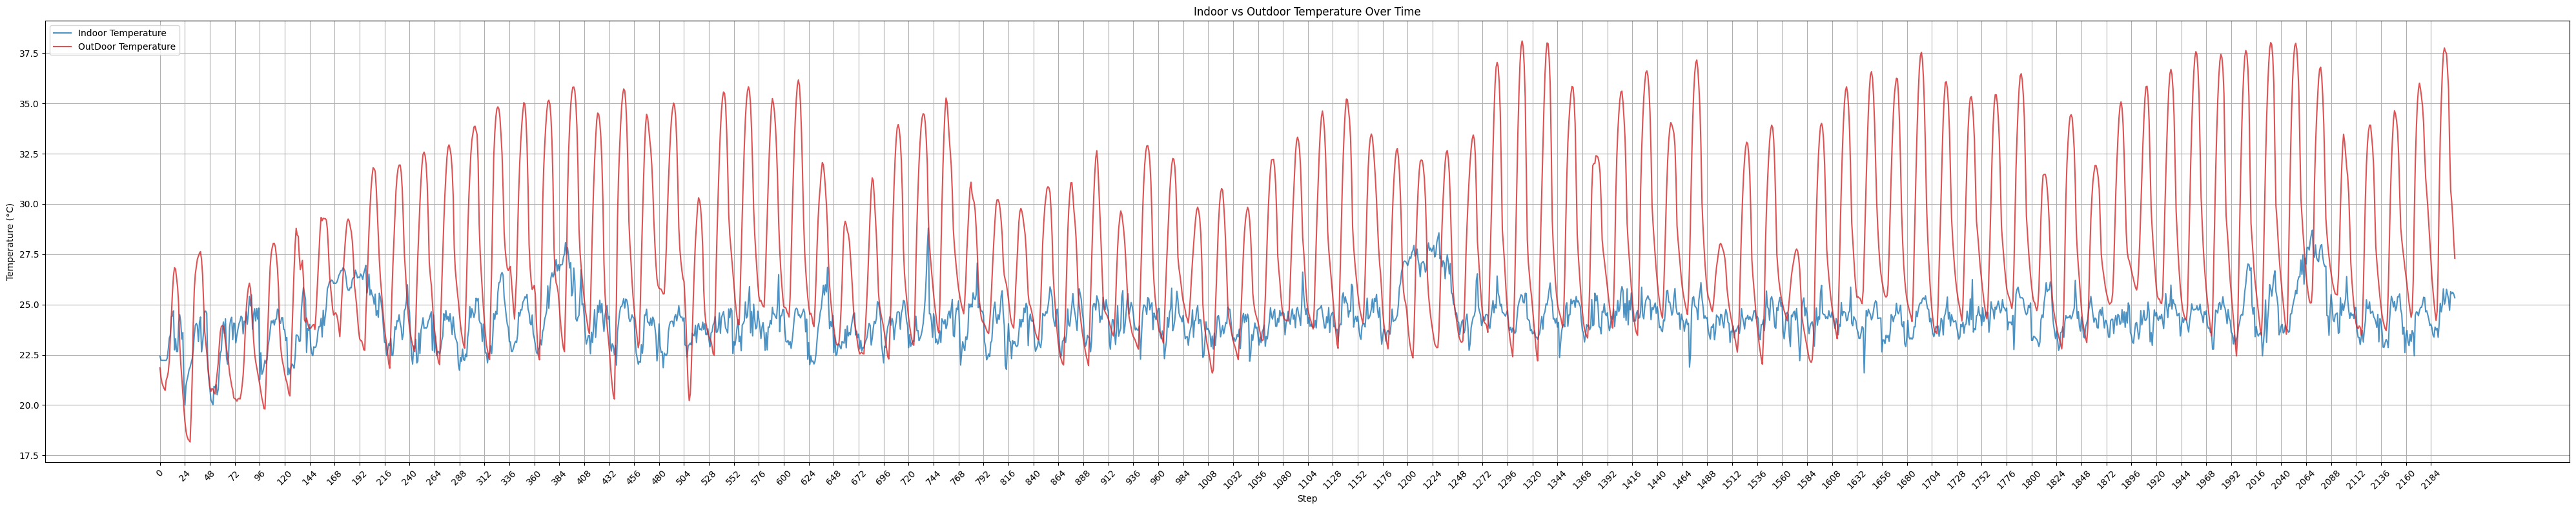

In [ ]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature

plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)

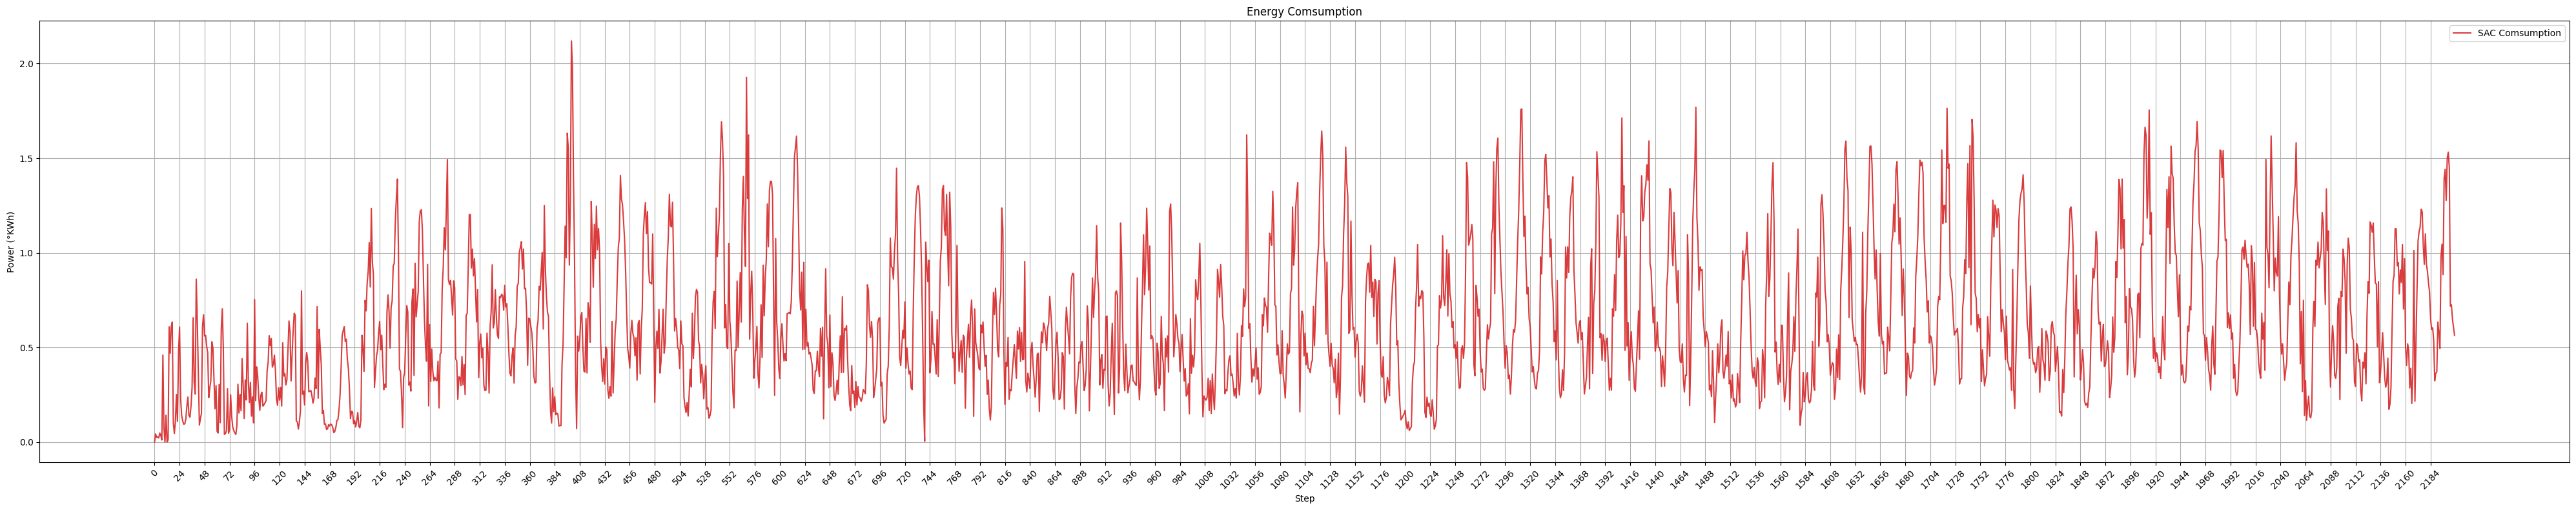

In [ ]:
cooler_energy = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy,
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='M2AC Comsumption',
)


----

## **Batteries and accumulators behavior**

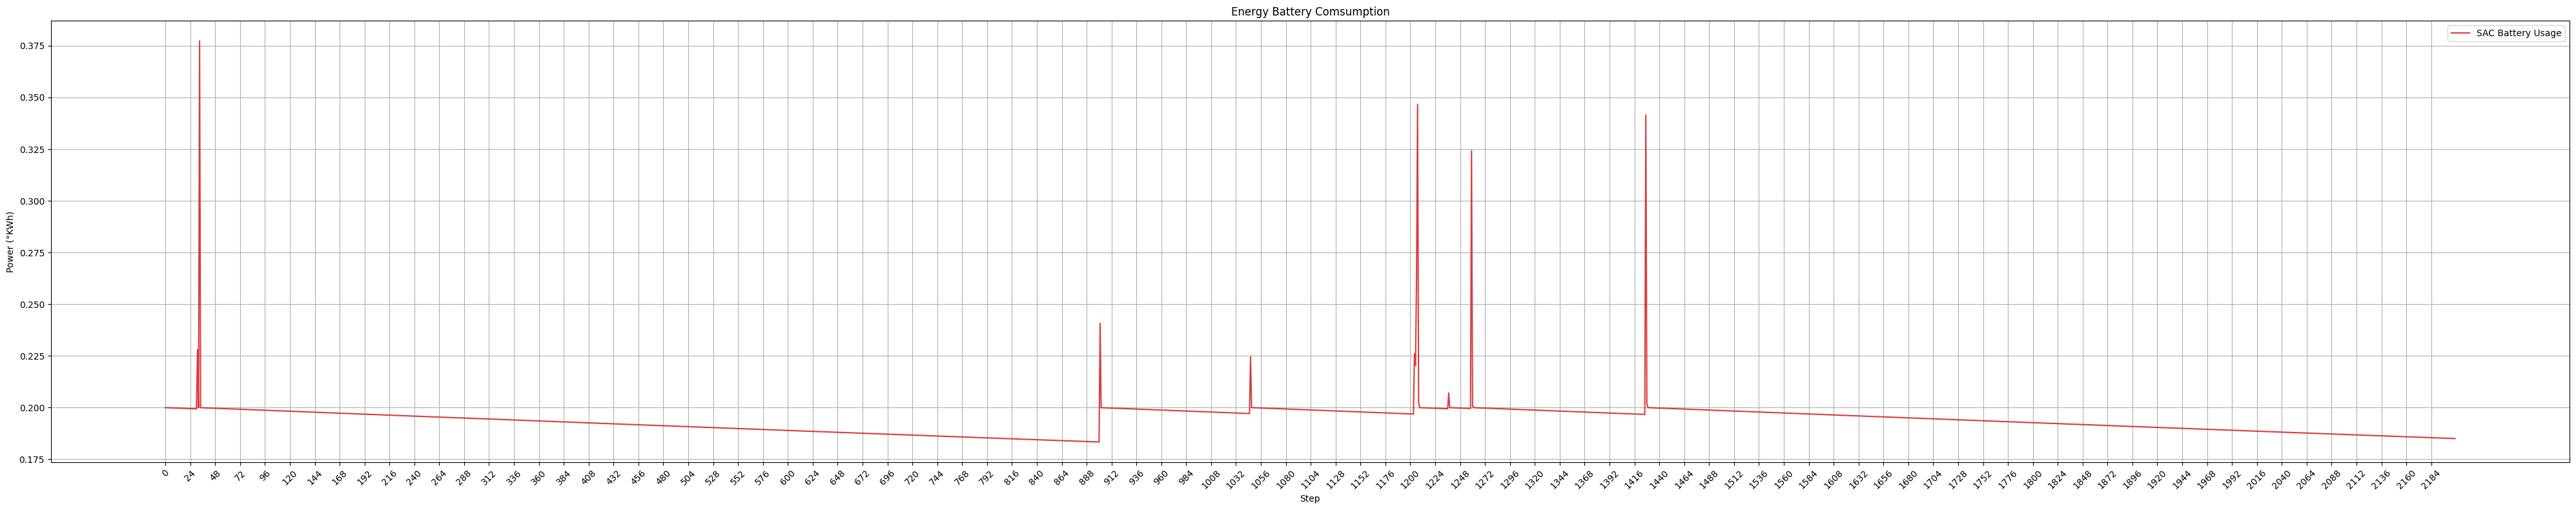

In [ ]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='M2AC Battery Usage'
)

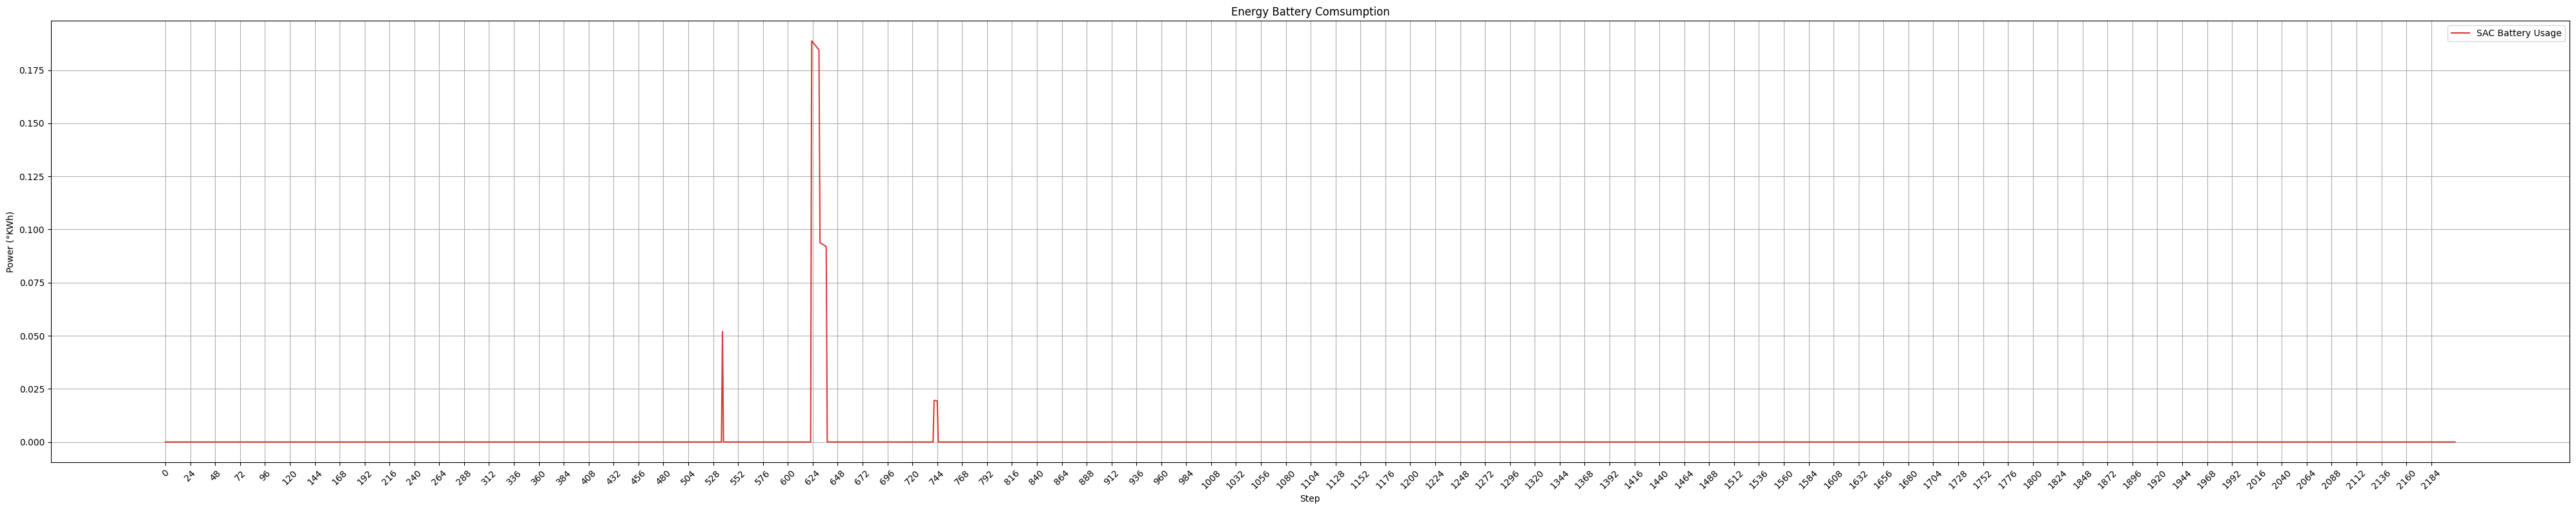

In [ ]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='DHW Usage'
)


----

## **Emissions behavior**


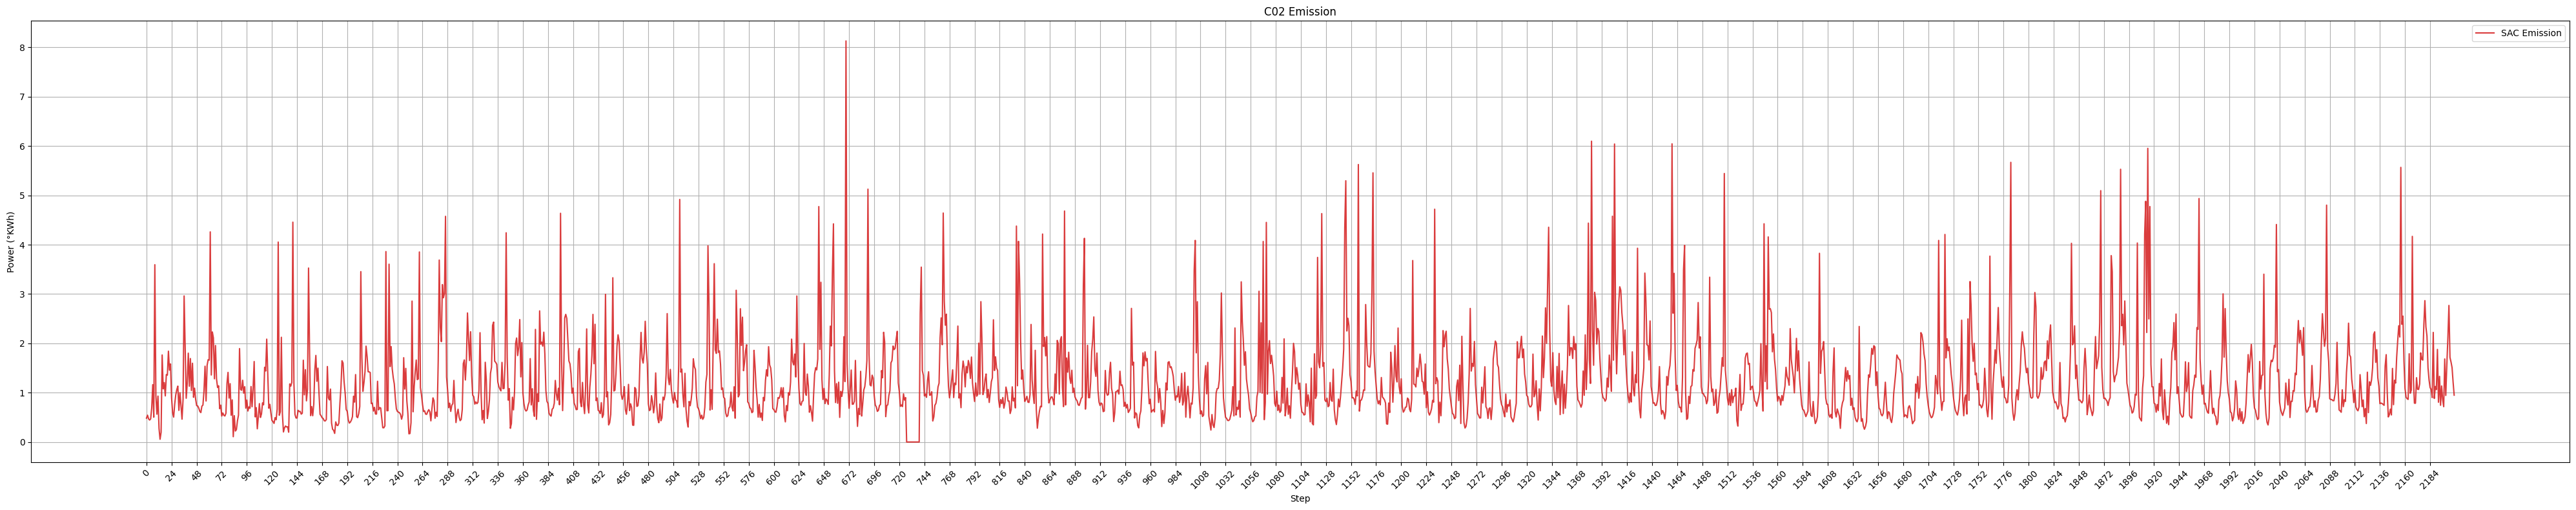

In [ ]:
agent_data1 = eval_env.net_electricity_consumption_emission

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='M2AC Emission'
)

---
## **Learning metrics**

Episodio  Reward Min  Reward Max  Reward Somma  Reward Media
0          1  -61.100899   -0.831622 -37960.464844    -17.200029
1          2  -65.973251    0.000000 -35687.882812    -16.170315
2          3  -69.762016    0.000000 -33075.722656    -14.986734
3          4  -47.242191    0.000000 -20309.248047     -9.202197
4          5  -69.931213    0.000000 -45732.414062    -20.721529
5          6  -56.683514    0.000000 -20172.031250     -9.140023
6          7  -46.377769    0.000000 -16550.300781     -7.499003
7          8  -63.669281    0.000000 -18007.105469     -8.159087
8          9  -43.260544    0.000000 -18325.462891     -8.303336
9         10  -43.699841    0.000000 -17396.261719     -7.882312
10        11  -42.846886    0.000000 -18304.472656     -8.293825
11        12  -43.839092    0.000000 -20252.464844     -9.176468
12        13  -42.577629    0.000000 -18269.824219     -8.278126
13        14  -42.567451    0.000000 -16319.367188     -7.394367
14        15  -42.897121    0.000000 -17394.341797     -7.881442
15        16  -43.313992    0.000000 -16308.849609     -7.389601
16        17  -43.046459    0.000000 -17964.201172     -8.139647
17        18  -43.791351    0.000000 -15668.850586     -7.099615
18        19  -45.233639    0.000000 -16974.234375     -7.691090
19        20  -43.683273    0.000000 -16095.500000     -7.292932
20        21  -43.849190    0.000000 -15531.919922     -7.037571
21        22  -43.511566    0.000000 -15310.123047     -6.937074

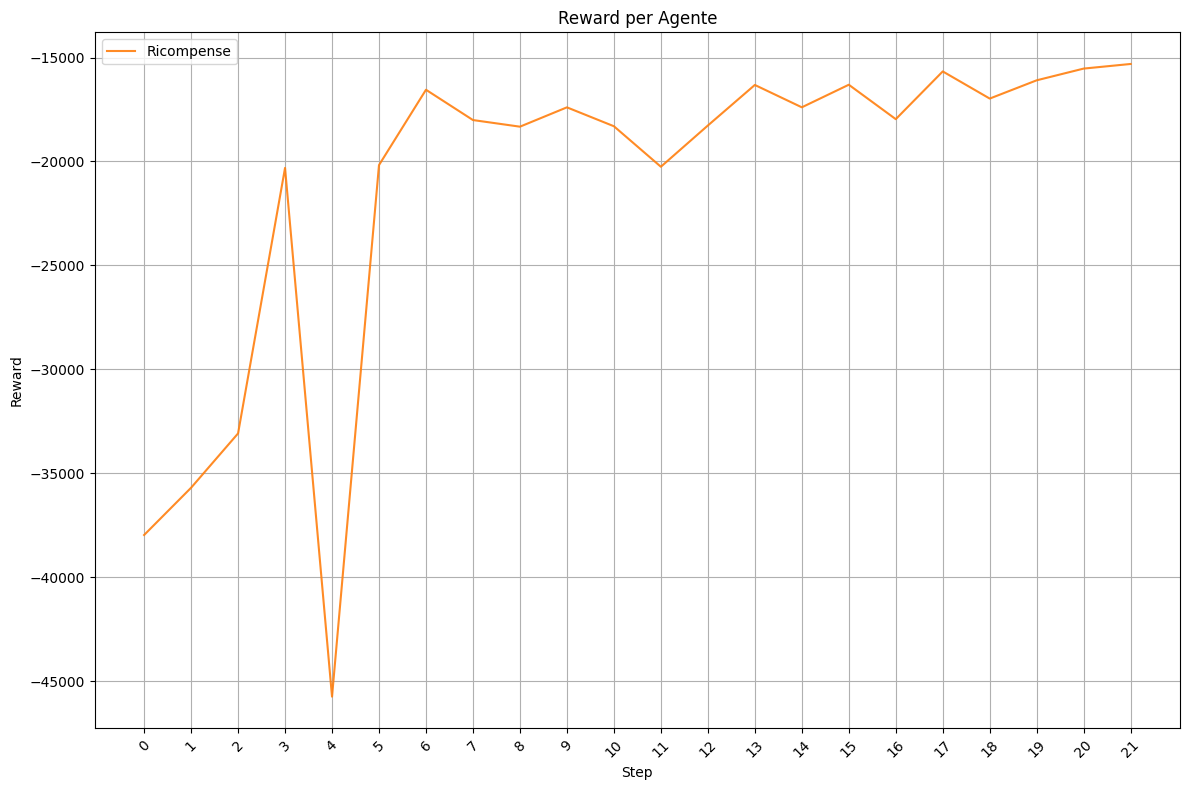

In [ ]:
df = plt.create_episode_table(eval_env.episode_rewards)

display(Markdown(f"### **M2AC - Base Version**"))
display(Markdown("----"))
display(df)

plt.plot_rewards(df['Reward Sum'])

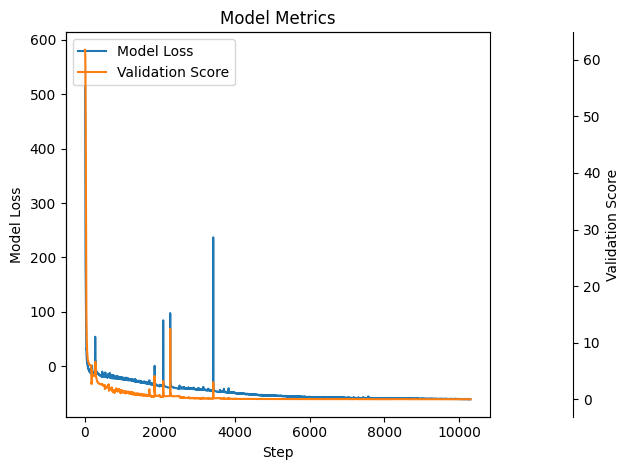

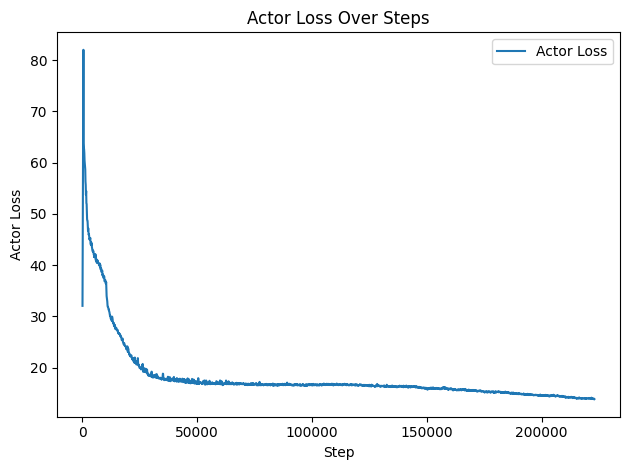

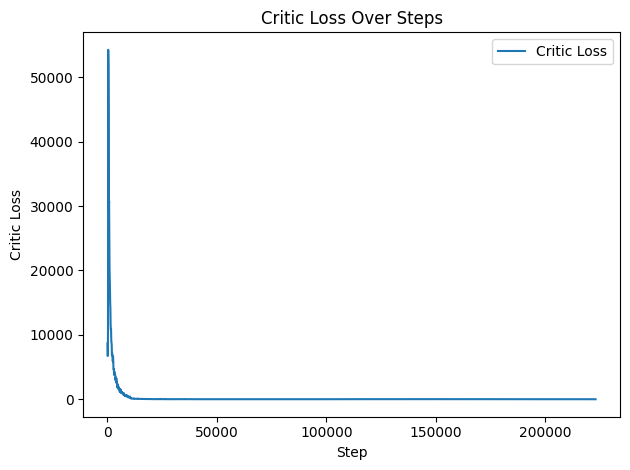

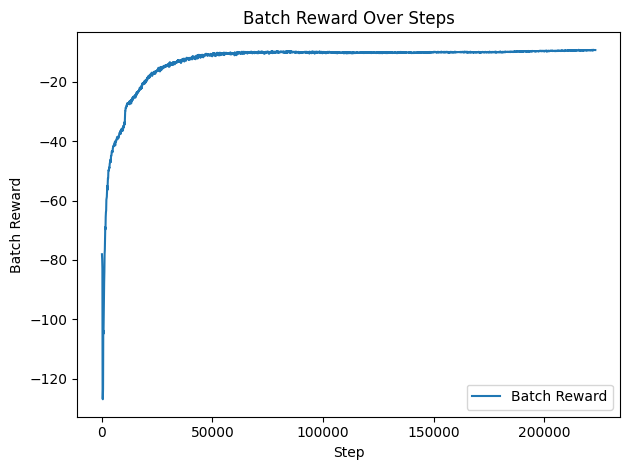

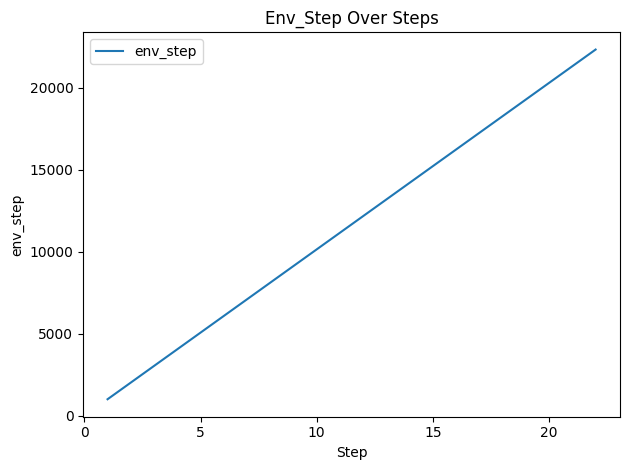

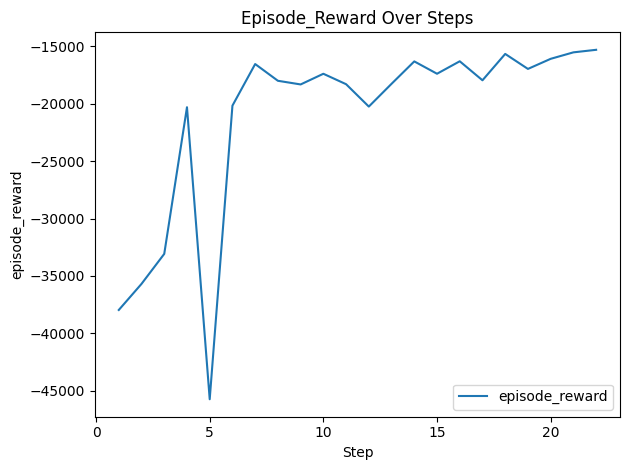

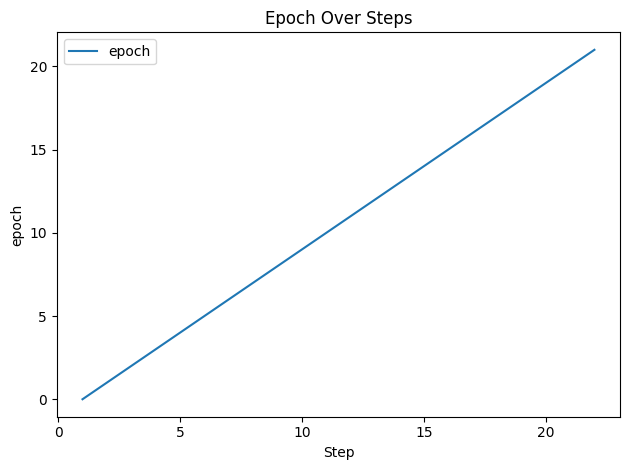

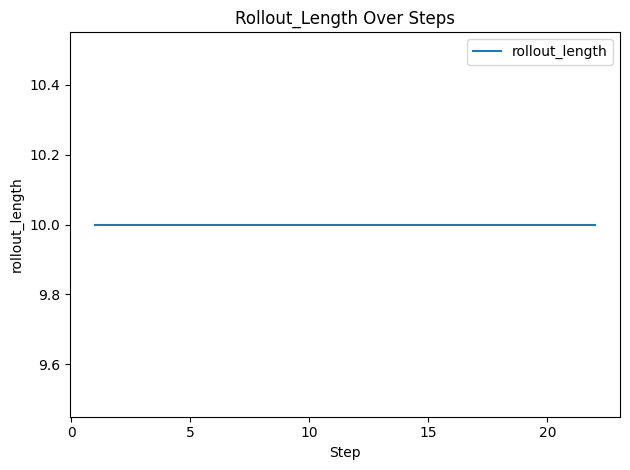

In [ ]:
plt.plot_learning_metrics(os.getcwd()+"/exp/m2ac")